# 📊 Exploratory Data Analysis (EDA)

This section explores the structure, distribution, and patterns in the dataset using summary statistics and visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\shpra\OneDrive\Desktop\DATA SCIENCE\CA2_python\CommodityStock.csv")  
df.head()
print("\n\n")

## 🔍 Basic Info and Structure
Checking the number of rows, columns, datatypes, and memory usage.


In [2]:
df.info()
print("\nShape of the dataset:", df.shape)
print("\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14097 entries, 0 to 14096
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodity_Id     14097 non-null  int64  
 1   Total_stock      14097 non-null  float64
 2   Commodity_Stock  14097 non-null  float64
 3   Code             14097 non-null  object 
 4   Date             14097 non-null  object 
 5   Individual_Date  14097 non-null  int64  
 6   District_name    14097 non-null  object 
 7   Month            14097 non-null  int64  
 8   Year             14097 non-null  int64  
 9   Commodity_name   14097 non-null  object 
 10  District_code    14097 non-null  object 
 11  Stock            14097 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.3+ MB

Shape of the dataset: (14097, 12)





## 📈 Descriptive Statistics
Basic statistics like mean, std deviation, and quartiles for numerical columns.


In [3]:
df.describe()
print("\n\n")

## ❗ Missing Values
Checking if any columns have null or missing values.


In [4]:
df.isnull().sum()
print("\n\n")

### IQR Outlier Removal

In [5]:
#IQR Filtering for outlier removal
Q1 = df['Stock'].quantile(0.25)
Q3 = df['Stock'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtering out outliers
df_filtered = df[(df['Stock'] >= lower_bound) & (df['Stock'] <= upper_bound)]
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after outlier removal: {df_filtered.shape}")
print("\n\n")

Original dataset size: (14097, 12)
Dataset size after outlier removal: (12424, 12)





## 📊 Univariate Analysis
Visualizing single-column distributions using histogram, barplot, boxplot, pie chart, violin plot and density plot (KDE~kernel density estimation).


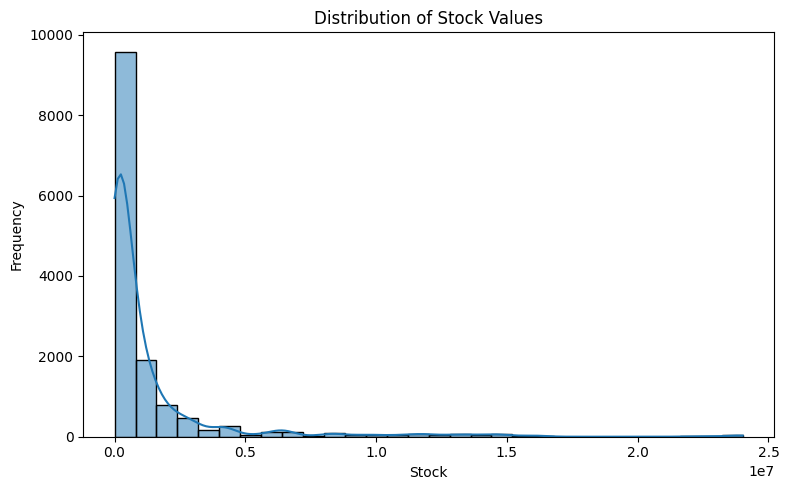

In [6]:
#histogram with KDE for visualizing the distribution of Stock values

plt.figure(figsize=(8, 5))
sns.histplot(df['Stock'], bins=30, kde=True)
plt.title("Distribution of Stock Values")
plt.xlabel("Stock")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


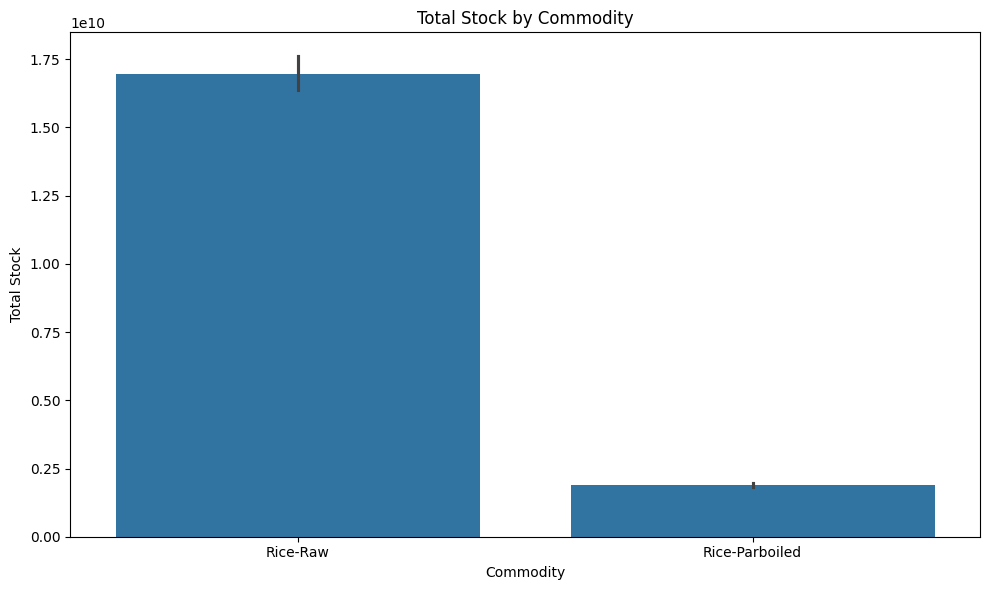

In [7]:
#barplot

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Commodity_name', y='Stock', estimator='sum') 
plt.title("Total Stock by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Total Stock")
plt.tight_layout()
plt.show()


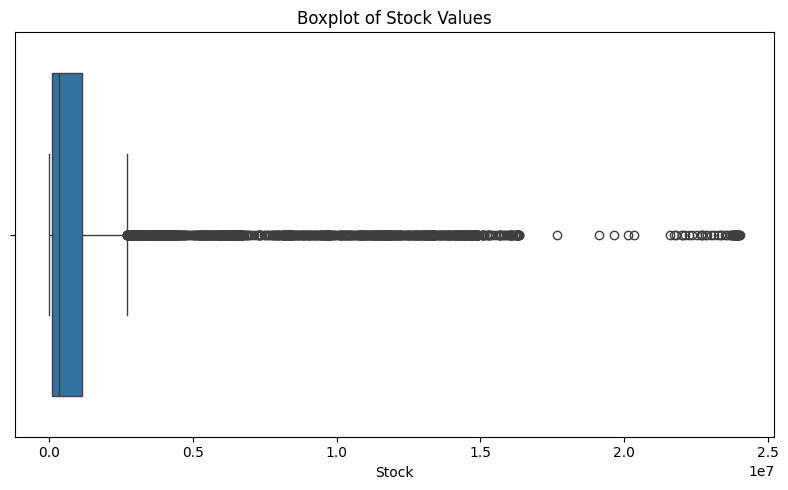

In [8]:
#boxplot for visualizing the distribution and outliers in Stock values

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Stock')
plt.title("Boxplot of Stock Values")
plt.xlabel("Stock")
plt.tight_layout()
plt.show()



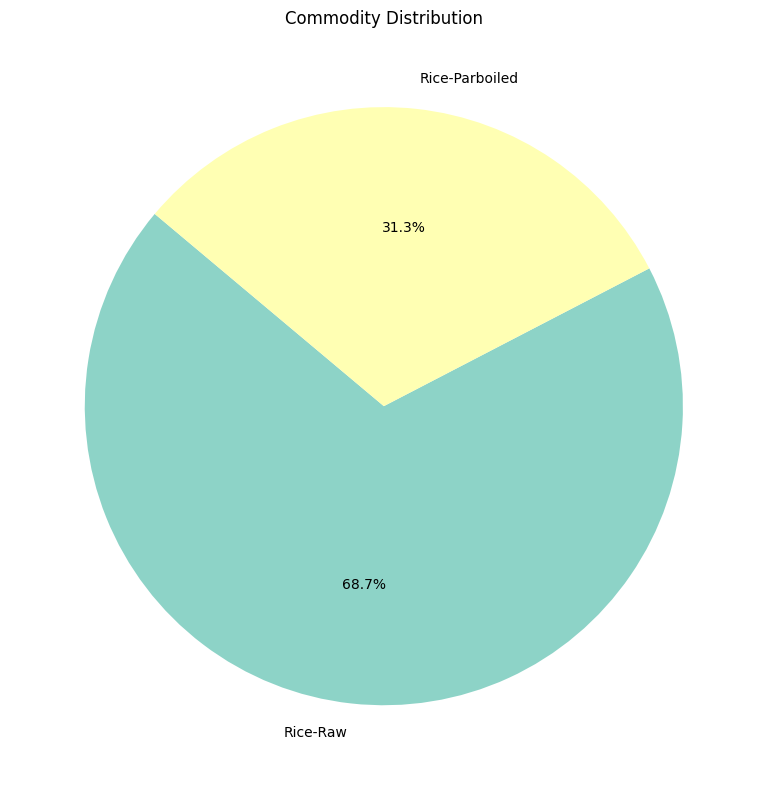

In [9]:
#pie chart for visualizing the percentage distribution of each Commodity type

plt.figure(figsize=(8, 8))
commodity_counts = df['Commodity_name'].value_counts()
plt.pie(commodity_counts, labels=commodity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(commodity_counts)))
plt.title("Commodity Distribution")
plt.tight_layout()
plt.show()

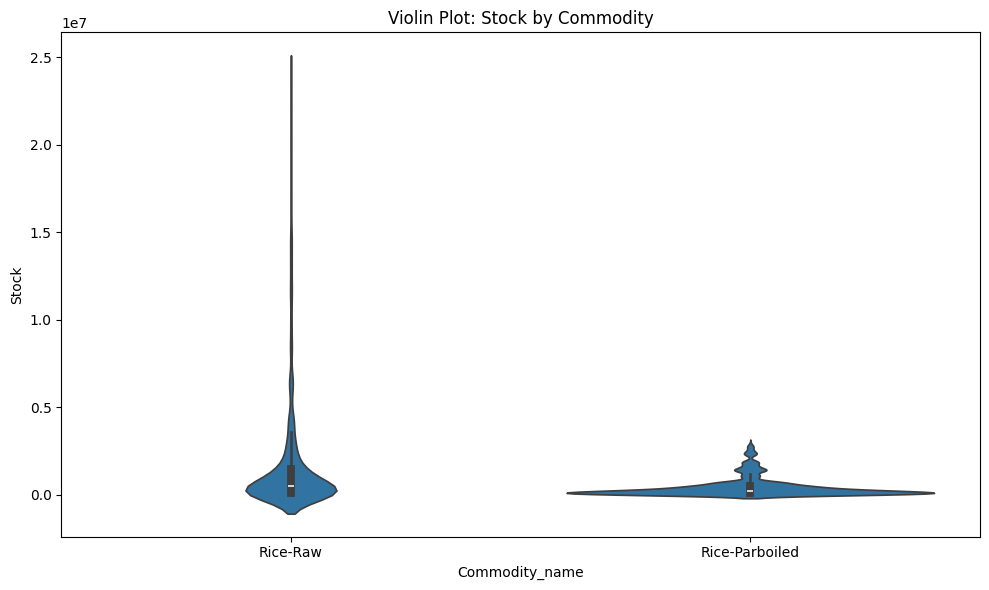

In [10]:
#violin plot to visualize the distribution of 'Stock' across 'commodity' 

plt.figure(figsize=(10, 6))
sns.violinplot(x='Commodity_name', y='Stock', data=df)
plt.title("Violin Plot: Stock by Commodity")
plt.tight_layout()
plt.show()


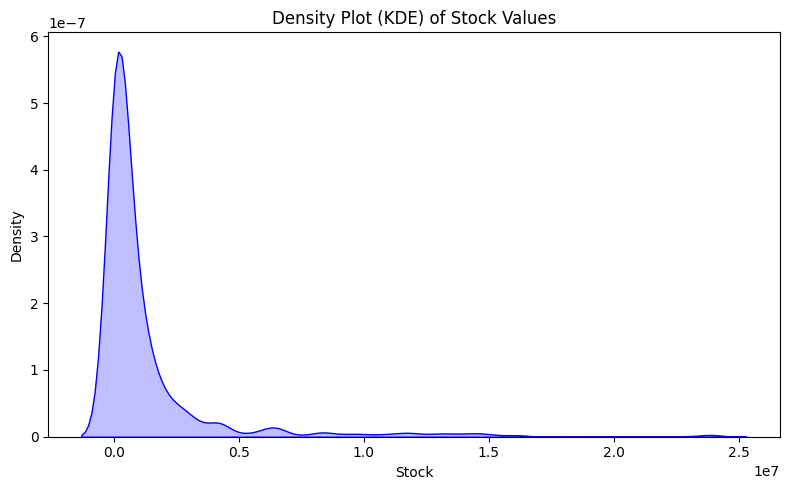

In [11]:
#density Plot (KDE~kernel density estimation) for showing the probability distribution of Stock values

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Stock'], fill=True, color='blue')
plt.title("Density Plot (KDE) of Stock Values")
plt.xlabel("Stock")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
print("\n\n")


## 📊 Bivariate Analysis
Visualizing relationships between pairs of numerical variables using heatmap, scatterplot and line plot.


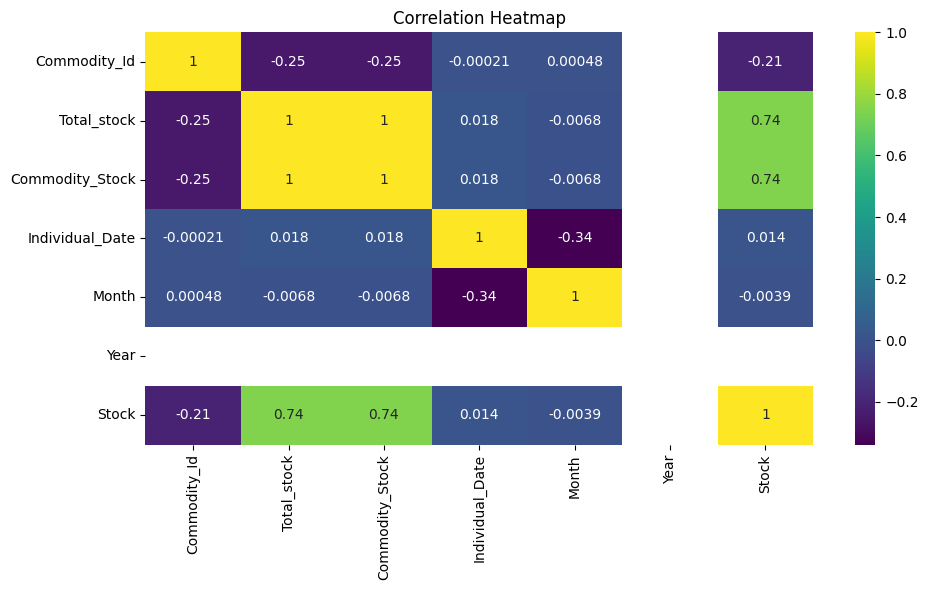

In [12]:
# Heatmap to visualize correlation between numerical variables in the dataset

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


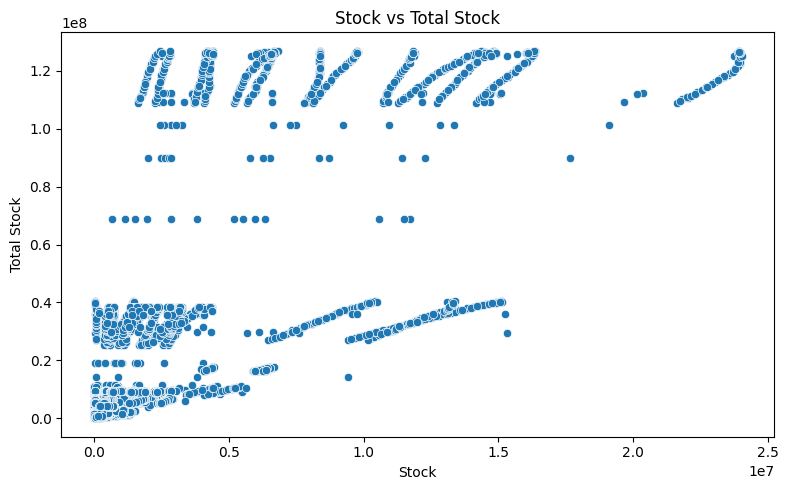

In [13]:
# Scatter plot to visualize the relationship between 'Stock' and 'Total_stock'

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Stock', y='Total_stock')
plt.title("Stock vs Total Stock")
plt.xlabel("Stock")
plt.ylabel("Total Stock")
plt.tight_layout()
plt.show()


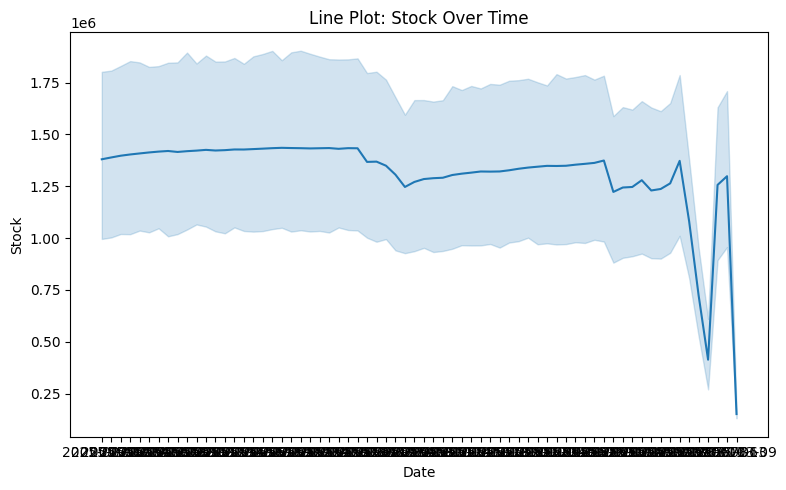

In [14]:
# Line plot to visualize the relationship between 'Date' and 'Stock'

plt.figure(figsize=(8, 5))
sns.lineplot(x='Date', y='Stock', data=df)
plt.title("Line Plot: Stock Over Time")
plt.tight_layout()
plt.show()
print("\n\n")

# 🧪 Hypothesis Testing: Z-test & t-test

In this section, we test whether there is a significant difference in the stock levels of two different commodities.  
We'll use:
- **Z-test** (when sample size is large and population standard deviation is known)
- **t-test** (when population standard deviation is unknown or sample size is small)

We will compare the stock of **Rice-Raw** and **Rice-Parboiled** commodities.


### 📊 Z-test  
We use the **Z-test** to determine if there's a significant difference in the stock levels of **Rice-Raw** and **Rice-Parboiled**.


In [15]:
# Z-test: Comparing the stock of 'Rice-Raw' and 'Rice-Parboiled' to check if there is a significant difference

from statsmodels.stats.weightstats import ztest

rice_raw_stock = df[df['Commodity_name'] == 'Rice-Raw']['Stock']
rice_parboiled_stock = df[df['Commodity_name'] == 'Rice-Parboiled']['Stock']

z_stat, p_value_z = ztest(rice_raw_stock, rice_parboiled_stock)

print("Z-test Statistic:", z_stat)
print("P-value:", p_value_z)

if p_value_z < 0.05:
    print("Result: Reject Null Hypothesis — Significant difference exists.")
else:
    print("Result: Fail to Reject Null Hypothesis — No significant difference.")
print("\n\n")

Z-test Statistic: 25.557624497721076
P-value: 4.517307999038834e-144
Result: Reject Null Hypothesis — Significant difference exists.





### 📊 t-test  
We use the **t-test** to determine if there's a significant difference in the stock levels of **Rice-Raw** and **Rice-Parboiled**, especially when the population standard deviation is unknown.


In [16]:
# T-test: Comparing the stock of 'Rice-Raw' and 'Rice-Parboiled' to check if there is a significant difference

from scipy.stats import ttest_ind

t_stat, p_value_t = ttest_ind(rice_raw_stock, rice_parboiled_stock)

print("t-test Statistic:", t_stat)
print("P-value:", p_value_t)

if p_value_t < 0.05:
    print("Result: Reject Null Hypothesis — Significant difference exists.")
else:
    print("Result: Fail to Reject Null Hypothesis — No significant difference.")
print("\n\n")

t-test Statistic: 25.557624497721072
P-value: 7.13069398365153e-141
Result: Reject Null Hypothesis — Significant difference exists.





## 🧪 Hypothesis Testing: Chi-Square Test

The **Chi-Square Test of Independence** is used to determine whether there is a significant relationship between two categorical variables.  
Here, we will test whether the **commodity type** and the **stock level category (High/Low)** are independent.


In [17]:
# Chi-Square Test: Testing the independence between 'Commodity_name' and 'stock_category'

from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

df['stock_category'] = np.where(df['Stock'] >= df['Stock'].median(), 'High', 'Low')

contingency_table = pd.crosstab(df['Commodity_name'], df['stock_category'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
if p_value < 0.05:
    print("Result: Reject Null Hypothesis — Variables are dependent.")
else:
    print("Result: Fail to Reject Null Hypothesis — Variables are independent.")
print("\n\n")

Chi-Square Statistic: 400.33858295576823
P-value: 4.647607851948265e-89
Result: Reject Null Hypothesis — Variables are dependent.





### 🔁 VIF (Variance Inflation Factor)  
We use **VIF** to detect multicollinearity between numerical features like **Stock** and **Total_stock**.  
A **VIF < 5** generally indicates no multicollinearity concern.


In [18]:
# Variance Inflation Factor (VIF): Assessing multicollinearity between features

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[['Stock', 'Total_stock']].dropna()

vif_data = pd.DataFrame()

vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)
print("\n\n")


Variance Inflation Factor (VIF):
       Feature       VIF
0        Stock  2.664111
1  Total_stock  2.664111





### 📈 Shapiro-Wilk Test  
We use the **Shapiro-Wilk Test** to check if the stock data for **Rice-Raw** and **Rice-Parboiled** follows a **normal distribution**.  
A **p-value > 0.05** indicates the data is likely normally distributed.


In [19]:
# Shapiro-Wilk Test: Testing for normality in stock data

from scipy.stats import shapiro

stat1, p1 = shapiro(rice_raw_stock.sample(500, random_state=42))  
stat2, p2 = shapiro(rice_parboiled_stock.sample(500, random_state=42))  

print("\nShapiro-Wilk Test:")
print("Rice-Raw Stock — W Statistic:", stat1, ", P-value:", p1)
print("Rice-Parboiled Stock — W Statistic:", stat2, ", P-value:", p2)

if p1 > 0.05 and p2 > 0.05:
    print("Result: Data is normally distributed.")
else:
    print("Result: Data is not normally distributed.")
print("\n\n")


Shapiro-Wilk Test:
Rice-Raw Stock — W Statistic: 0.5539335489635346 , P-value: 1.0225395485293217e-33
Rice-Parboiled Stock — W Statistic: 0.6823230491675245 , P-value: 1.457552297666192e-29
Result: Data is not normally distributed.





## 📊 Conclusion and Key Insights

This project successfully conducted Exploratory Data Analysis (EDA) and a variety of statistical tests on the given commodity stock dataset. Below are the key insights and takeaways:

- **EDA revealed** the structure, distribution, and patterns in stock levels across different commodities.
- **Missing values were negligible or absent**, and outliers in stock values were effectively handled using the IQR method.
- **Univariate and bivariate visualizations** (histogram, countplot, scatterplot, heatmap) provided meaningful insights into the relationships between numeric variables and commodity types.
- **Z-test and t-test** indicated whether a statistically significant difference exists between the stock distributions of 'Rice-Raw' and 'Rice-Parboiled' commodities.
- **Chi-Square test** assessed the association between commodity type and stock category (high/low), helping evaluate dependency between categorical variables.
- **Variance Inflation Factor (VIF)** was calculated to detect multicollinearity between continuous variables, ensuring reliability of regression assumptions.
- **Shapiro-Wilk test** evaluated the normality of stock distributions for selected commodities, strengthening the choice of statistical methods.

Overall, this study not only demonstrated sound understanding of statistical testing but also built strong data-driven intuition through visual and numeric interpretation.
